In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
%config InlineBackend.figure_format = 'svg'
# plt.rcParams['font.size'] = 15

In [2]:
def get_vacuum(fname):
    try:
        f = open(fname,"r")
    except:
        raise FileNotFoundError(fname)
    line = f.readline()
    while line != '':
        if 'vacuum' in line:
            vacuum = float(line.split()[-2])
            return vacuum
        else:
            line = f.readline()
def get_eqp_homo_lumo_gap(fname):
    try:
        f = open(fname,"r")
    except:
        raise FileNotFoundError(fname)  
    f.readline();
    f.readline();
    line = f.readline()
    homo = float(line.split()[5])
    line = f.readline()
    lumo = float(line.split()[5])
    return homo,lumo,lumo-homo
def model_func(x,a,b):
    return a+b/x

-13.974258873387646 8.699524240808302
-13.986716875179336 8.415180380970234
-14.211927381928517 7.907991933646479


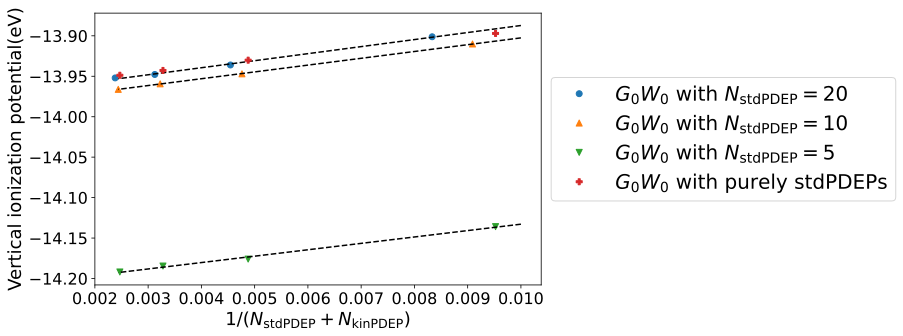

In [3]:
pdep_tot = []
kin = []
std = []
nstds = [20,10,5]
for m in ['CH4']:
    prefix = "./G2_97/%s-PBE/wfreq"%m
    for istd in range(len(nstds)):
        pdep_tot.append([])
        kin.append([])
        std.append([])
        for i in range(100,401,100):
            pdep_tot[-1].append(nstds[istd]+i)
            fname = prefix+"/kin-%d/kin-%d-%d/o-eqp.converged.tab"%(nstds[istd],nstds[istd],i)
            homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
            kin[-1].append([homo,lumo])
            
            fname = prefix+"/std-%d/o-eqp.converged.tab"%(nstds[istd]+i)
            homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
            std[-1].append([homo,lumo])

pdep_tot = np.array(pdep_tot)
kin = np.array(kin)
std = np.array(std)

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
markers = ['o','^','v','P','*','x']
for istd in range(3):
    p,q = curve_fit(model_func,pdep_tot[istd],kin[istd][:,0])
    print(p[0],p[1])
    xx = np.arange(100,420,10)
    yy = model_func(xx,*p)
    
    plt.plot(1/pdep_tot[istd],kin[istd][:,0],markers[istd],label=r'$G_0W_0$ with $N_\mathrm{stdPDEP}=%d$'%(nstds[istd]))
    plt.plot(1/xx,yy,'--k')

plt.plot(1/pdep_tot[istd],std[istd][:,0],markers[istd+1],label=r'$G_0W_0$ with purely stdPDEPs')


plt.legend(fontsize=20,bbox_to_anchor=(1.0, 0.8))
plt.xlabel(r'$1/(N_\mathrm{stdPDEP}+N_\mathrm{kinPDEP})$',fontsize=18)
plt.ylabel('Vertical ionization potential(eV)',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# fig.savefig('fig/Fitting_from_different_stdPDEP.eps',bbox_inches="tight",dpi=200)
# fig.savefig('fig/Fitting_from_different_stdPDEP.png',bbox_inches="tight",dpi=200)

-13.999550146100985 5.564124087620839


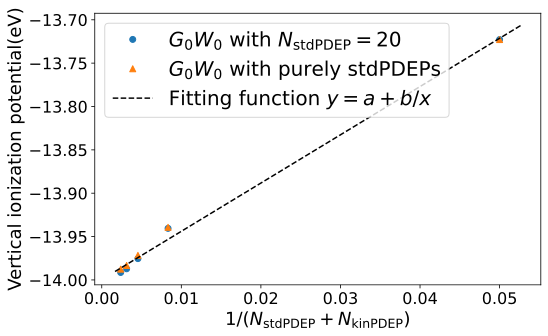

0.03933891


In [4]:
for m in ['CH4']:
    x = []
    y = []
    z = []
    vacuum = get_vacuum("./G2_97/%s-PBE/pw/%s.out"%(m,m.lower()))
    prefix = "./G2_97/%s-PBE/wfreq"%m
    for i in range(0,401,100):
        fname = prefix+"/kin-20/kin-20-%d/o-eqp.converged.tab"%i
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
        x.append(20+i)
        y.append(homo-vacuum)
    for i in range(0,401,100):
        fname = prefix+"/std-%d/o-eqp.converged.tab"%(i+20)
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
#         x.append(20+i)
        z.append(homo-vacuum)
    p,q = curve_fit(model_func,x,y)
    print(p[0],p[1])
    xx = np.arange(19,600,10)
    
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    
    fig = plt.figure(figsize=(8,5))
    ax = plt.subplot(111)
    plt.plot(1/x,y,'o',c='C0',label=r'$G_0W_0$ with $N_\mathrm{stdPDEP}=20$')
    plt.plot(1/x,z,'^',c='C1',label=r'$G_0W_0$ with purely stdPDEPs')
    plt.plot(1/xx,model_func(xx,*p),'--k',label=r'Fitting function $y = a+b/x$')
#     ax.axhline(y=p[0],c='r',label='Converged value')
    plt.legend(fontsize=20)
    plt.xlabel(r'$1/(N_\mathrm{stdPDEP}+N_\mathrm{kinPDEP})$',fontsize=18)
    plt.ylabel('Vertical ionization potential(eV)',fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    print(vacuum)

#     fig.savefig('fig/Fitting_example_of_%s_1_to_N.eps'%m,bbox_inches="tight",dpi=200)   
#     fig.savefig('fig/Fitting_example_of_%s_1_to_N.png'%m,bbox_inches="tight",dpi=200)